In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('/content/training_set_features.csv')
Y = pd.read_csv('/content/training_set_labels.csv')
test_features = pd.read_csv('/content/test_set_features.csv')

In [3]:
X.shape

(26707, 36)

In [4]:
X.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
X.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
Y

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
df = pd.merge(X, Y, on='respondent_id')

In [9]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
test_features

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [12]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [13]:
(df.isnull().sum()/len(df))*100

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [14]:
(test_features.isnull().sum()/len(test_features))*100

respondent_id                   0.000000
xyz_concern                     0.318257
xyz_knowledge                   0.456792
behavioral_antiviral_meds       0.295792
behavioral_avoidance            0.797514
behavioral_face_mask            0.071140
behavioral_wash_hands           0.149768
behavioral_large_gatherings     0.269582
behavioral_outside_home         0.307024
behavioral_touch_face           0.479257
doctor_recc_xyz                 8.087464
doctor_recc_seasonal            8.087464
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
health_insurance               45.784035
opinion_xyz_vacc_effective      1.490190
opinion_xyz_risk                1.422795
opinion_xyz_sick_from_vacc      1.404074
opinion_seas_vacc_effective     1.692377
opinion_seas_risk               1.868354
opinion_seas_sick_from_vacc     1.950726
age_group                       0.000000
education                       5.268084
race            

In [15]:
df.drop(columns = ['employment_occupation','employment_industry'], inplace = True)
test_features.drop(columns = ['employment_occupation','employment_industry'], inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [17]:
for i in df.columns[1:36]:
  print(df[i].value_counts())

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64
behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64
doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64
chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64
child_under_6_months
0.0    23749
1.0     2138
Name: count, dtype: int64
health_worker
0

In [18]:
df['age_group'].replace({'65+ Years': 4, '55 - 64 Years': 3, '45 - 54 Years': 2, '35 - 44 Years': 1, '18 - 34 Years': 0}, inplace  = True)

In [19]:
test_features['age_group'].replace({'65+ Years': 4, '55 - 64 Years': 3, '45 - 54 Years': 2, '35 - 44 Years': 1, '18 - 34 Years': 0}, inplace  = True)

In [20]:
df['education'].replace({'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3}, inplace = True)

In [21]:
test_features['education'].replace({'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3}, inplace = True)

In [22]:
df['race'].replace({'White': 0, 'Black': 1, 'Hispanic': 2, 'Other or Multiple': 3}, inplace = True)

In [23]:
test_features['race'].replace({'White': 0, 'Black': 1, 'Hispanic': 2, 'Other or Multiple': 3}, inplace = True)

In [24]:
df['sex'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [25]:
test_features['sex'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [26]:
df['income_poverty'].replace({'<= $75,000, Above Poverty': 1, '> $75,000': 2, 'Below Poverty': 0}, inplace = True)

In [27]:
test_features['income_poverty'].replace({'<= $75,000, Above Poverty': 1, '> $75,000': 2, 'Below Poverty': 0}, inplace = True)

In [28]:
df['marital_status'].replace({'Married': 1, 'Not Married': 0}, inplace = True)

In [29]:
test_features['marital_status'].replace({'Married': 1, 'Not Married': 0}, inplace = True)

In [30]:
df['rent_or_own'].replace({'Rent': 0, 'Own': 1}, inplace = True)

In [31]:
test_features['rent_or_own'].replace({'Rent': 0, 'Own': 1}, inplace = True)

In [32]:
df['employment_status'].replace({'Unemployed': 0, 'Employed': 1, 'Not in Labor Force': 2}, inplace = True)

In [33]:
test_features['employment_status'].replace({'Unemployed': 0, 'Employed': 1, 'Not in Labor Force': 2}, inplace = True)

In [34]:
df['census_msa'].replace({'MSA, Not Principle  City': 2, 'MSA, Principle City': 1, 'Non-MSA': 0}, inplace = True)

In [35]:
test_features['census_msa'].replace({'MSA, Not Principle  City': 2, 'MSA, Principle City': 1, 'Non-MSA': 0}, inplace = True)

In [36]:
df['hhs_geo_region'].replace({'lzgpxyit': 0, 'fpwskwrf': 1, 'qufhixun': 2, 'oxchjgsf': 3, 'kbazzjca': 4, 'bhuqouqj': 5, 'mlyzmhmf': 6, 'lrircsnp': 7, 'atmpeygn': 8, 'dqpwygqj': 9}, inplace = True)

In [37]:
test_features['hhs_geo_region'].replace({'lzgpxyit': 0, 'fpwskwrf': 1, 'qufhixun': 2, 'oxchjgsf': 3, 'kbazzjca': 4, 'bhuqouqj': 5, 'mlyzmhmf': 6, 'lrircsnp': 7, 'atmpeygn': 8, 'dqpwygqj': 9}, inplace = True)

In [38]:
for i in df.columns[1:36]:
  print(df[i].value_counts())

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64
behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64
doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64
chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64
child_under_6_months
0.0    23749
1.0     2138
Name: count, dtype: int64
health_worker
0

In [39]:
for i in test_features.columns[1:36]:
  print(test_features[i].value_counts())

xyz_concern
2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: count, dtype: int64
xyz_knowledge
1.0    14629
2.0     9515
0.0     2442
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25307
1.0     1322
Name: count, dtype: int64
behavioral_avoidance
1.0    19336
0.0     7159
Name: count, dtype: int64
behavioral_face_mask
0.0    24840
1.0     1849
Name: count, dtype: int64
behavioral_wash_hands
1.0    22030
0.0     4638
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17273
1.0     9363
Name: count, dtype: int64
behavioral_outside_home
0.0    17647
1.0     8979
Name: count, dtype: int64
behavioral_touch_face
1.0    18174
0.0     8406
Name: count, dtype: int64
doctor_recc_xyz
0.0    19082
1.0     5466
Name: count, dtype: int64
doctor_recc_seasonal
0.0    16360
1.0     8188
Name: count, dtype: int64
chronic_med_condition
0.0    18532
1.0     7244
Name: count, dtype: int64
child_under_6_months
0.0    23660
1.0     2235
Name: count, dtype: int64
health_worker
0

In [40]:
df.drop(columns = ['health_insurance'], inplace = True)
test_features.drop(columns = ['health_insurance'], inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [42]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=100)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
test_features_imputed = pd.DataFrame(imputer.fit_transform(test_features), columns=test_features.columns)

In [44]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  float64
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [45]:
# X_train = df_imputed.iloc[:, 1:33]
# Y_train = df_imputed['xyz_vaccine']
# y_train = df_imputed['seasonal_vaccine']

In [46]:
X_test = test_features_imputed.iloc[:, 1:]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df_imputed.iloc[:, 1:33], df_imputed['xyz_vaccine'], test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(df_imputed.iloc[:, 1:33], df_imputed['seasonal_vaccine'], test_size=0.2, random_state=42)

In [48]:
X_train.shape

(21365, 32)

In [49]:
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best estimator
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(C = 1, solver = 'liblinear', penalty = 'l1')
logreg2 = LogisticRegression(C = 1, solver = 'liblinear', penalty = 'l1')
logreg1.fit(X_train, Y_train)
logreg2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [53]:
y_pred1_lr = logreg1.predict_proba(X_val)[:, 1]
y_pred2_lr = logreg2.predict_proba(x_val)[:, 1]

In [54]:
y_pred1_lr.shape

(5342,)

In [55]:
from sklearn.svm import SVC
svc1 = SVC(probability = True, C= 0.1, kernel = 'linear', gamma = 'scale')
svc2 = SVC(probability = True, C= 0.1, kernel = 'linear', gamma = 'scale')
svc1.fit(X_train, Y_train)
svc2.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [57]:
svc1.classes_

array([0., 1.])

In [58]:
y_pred1_svm = svc1.predict_proba(X_val)[:, 1]
y_pred2_svm = svc2.predict_proba(x_val)[:, 1]

In [59]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

In [62]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
grid_search = GridSearchCV(estimator=cnb, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best model
best_cnb = grid_search.best_estimator_
best_cnb

Fitting 5 folds for each of 4 candidates, totalling 20 fits


CategoricalNB(alpha=2.0)

In [63]:
# Initialize the CategoricalNB model
nb1 = CategoricalNB(alpha=2)
nb2 = CategoricalNB(alpha=2)
# Fit the model
nb1.fit(X_train, Y_train)
nb2.fit(X_train, y_train)

CategoricalNB(alpha=2)

In [64]:
nb1.classes_

array([0., 1.])

In [65]:
# Predict probabilities on the test data
y_pred1_nb = nb1.predict_proba(X_val)[:, 1]
y_pred2_nb = nb2.predict_proba(x_val)[:, 1]

In [66]:
y_pred1_svm

array([0.25608095, 0.19088722, 0.21162195, ..., 0.30117407, 0.2573574 ,
       0.25094703])

In [67]:
y_pred1_svm.shape

(5342,)

In [68]:
y_pred1_nb

array([0.01449723, 0.00367712, 0.04571853, ..., 0.56897823, 0.06359428,
       0.31013806])

In [69]:
y_pred1_nb.shape

(5342,)

In [70]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [72]:
# # Initialize the SVM model
# svc = SVC()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# grid_search.fit(X_train, Y_train)


In [73]:
# # Best parameters found by GridSearchCV
# print(f"Best parameters: {grid_search.best_params_}")

# # Best estimator
# best_model = grid_search.best_estimator_
# best_model

In [74]:
# Calculate AUC-ROC scores
from sklearn.metrics import roc_auc_score, roc_curve
logreg1_auc = roc_auc_score(Y_val, y_pred1_lr)
svm1_auc = roc_auc_score(Y_val, y_pred1_svm)
nb1_auc = roc_auc_score(Y_val, y_pred1_nb)

In [75]:
# Calculate AUC-ROC scores
logreg2_auc = roc_auc_score(y_val, y_pred2_lr)
svm2_auc = roc_auc_score(y_val, y_pred2_svm)
nb2_auc = roc_auc_score(y_val, y_pred2_nb)

In [76]:
# Print AUC-ROC scores
print(f"Logistic Regression1 AUC-ROC: {logreg1_auc}")
print(f"SVM1 AUC-ROC: {svm1_auc}")
print(f"Naive Bayes1 AUC-ROC: {nb1_auc}")
print(f"Logistic Regression2 AUC-ROC: {logreg2_auc}")
print(f"SVM2 AUC-ROC: {svm2_auc}")
print(f"Naive Bayes2 AUC-ROC: {nb2_auc}")


Logistic Regression1 AUC-ROC: 0.683806066106951
SVM1 AUC-ROC: 0.6060854364689172
Naive Bayes1 AUC-ROC: 0.8033627057963341
Logistic Regression2 AUC-ROC: 0.76343683128086
SVM2 AUC-ROC: 0.7684325685546712
Naive Bayes2 AUC-ROC: 0.8236607341316295


In [77]:
mean_auc_roc_nb = (nb1_auc + nb2_auc)/2
mean_auc_roc_svm = (svm1_auc + svm2_auc)/2
mean_auc_roc_logreg = (logreg1_auc + logreg2_auc)/2
print(f"Mean AUC-ROC for Naive Bayes: {mean_auc_roc_nb}")
print(f"Mean AUC-ROC for SVM: {mean_auc_roc_svm}")
print(f"Mean AUC-ROC for Logistic Regression: {mean_auc_roc_logreg}")

Mean AUC-ROC for Naive Bayes: 0.8135117199639819
Mean AUC-ROC for SVM: 0.6872590025117942
Mean AUC-ROC for Logistic Regression: 0.7236214486939055


In [78]:
#Plot AUC-ROC curve
logreg1_fpr, logreg1_tpr, _ = roc_curve(Y_val, y_pred1_lr)
svm1_fpr, svm1_tpr, _ = roc_curve(Y_val, y_pred1_svm)
nb1_fpr, nb1_tpr, _ = roc_curve(Y_val, y_pred1_nb)

In [79]:
#Plot AUC-ROC curve
logreg2_fpr, logreg2_tpr, _ = roc_curve(y_val, y_pred2_lr)
svm2_fpr, svm2_tpr, _ = roc_curve(y_val, y_pred2_svm)
nb2_fpr, nb2_tpr, _ = roc_curve(y_val, y_pred2_nb)

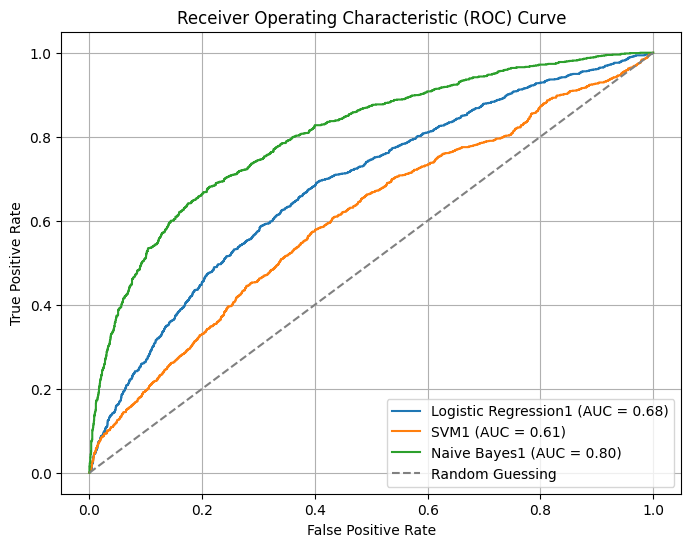

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(logreg1_fpr, logreg1_tpr, label=f"Logistic Regression1 (AUC = {logreg1_auc:.2f})")
plt.plot(svm1_fpr, svm1_tpr, label=f"SVM1 (AUC = {svm1_auc:.2f})")
plt.plot(nb1_fpr, nb1_tpr, label=f"Naive Bayes1 (AUC = {nb1_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

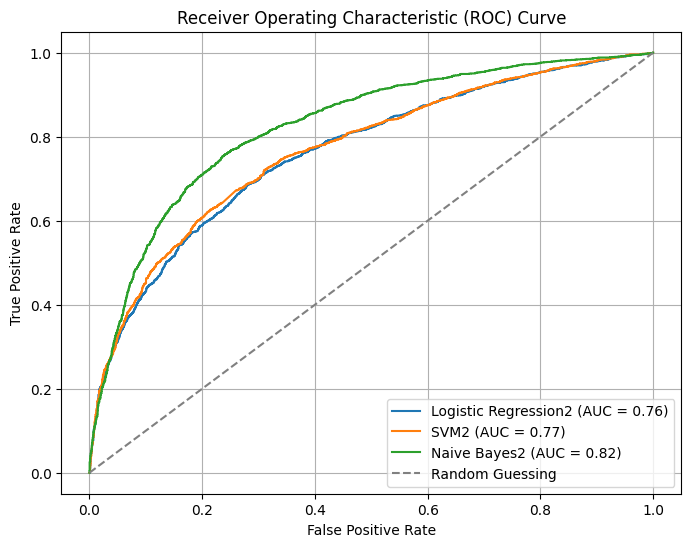

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(logreg2_fpr, logreg2_tpr, label=f"Logistic Regression2 (AUC = {logreg2_auc:.2f})")
plt.plot(svm2_fpr, svm2_tpr, label=f"SVM2 (AUC = {svm2_auc:.2f})")
plt.plot(nb2_fpr, nb2_tpr, label=f"Naive Bayes2 (AUC = {nb2_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

BEST ROC-AUC SCORE IS GIVEN BY NAIVE BAYES:

*   For Model 1(predicting probability of xyz_vaccine) - 0.80
*   For Model 2(predicting probability of seasonal_vaccine) - 0.82
*   Mean Score - 0.81






In [82]:
y_pred1_for_test_features = nb1.predict_proba(X_test)[:, 1]
y_pred2_for_test_features = nb2.predict_proba(X_test)[:, 1]

In [83]:
y_pred1_for_test_features.shape

(26708,)

In [84]:
y_pred2_for_test_features

array([2.25981027e-01, 8.00754840e-04, 9.71035863e-01, ...,
       2.07149817e-02, 4.26889340e-01, 7.06447772e-01])

In [85]:
test_output = pd.DataFrame({'respondent_id': test_features['respondent_id'], 'xyz_vaccine': y_pred1_for_test_features, 'seasonal_vaccine': y_pred2_for_test_features})

In [86]:
test_output

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.044361,0.225981
1,26708,0.000354,0.000801
2,26709,0.768488,0.971036
3,26710,0.148621,0.924628
4,26711,0.213133,0.588574
...,...,...,...
26703,53410,0.048015,0.226424
26704,53411,0.029522,0.116128
26705,53412,0.001832,0.020715
26706,53413,0.016470,0.426889


In [87]:
test_output.to_csv('test_output.csv', index = False)